# KADOMS PROJECT

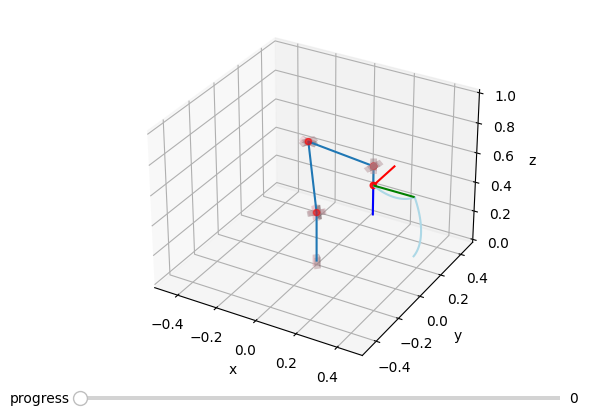

In [1]:
#!/usr/bin/env python3
%matplotlib inline


from visual_kinematics.RobotSerial import *
from visual_kinematics.RobotTrajectory import *
import numpy as np
from math import pi


def main():
    np.set_printoptions(precision=3, suppress=True)

    dh_params = np.array([[0.34, 0., -pi / 2, 0.],
                          [0., 0., pi / 2, 0.],
                          [0.4, 0., -pi / 2, 0.],
                          [0., 0., pi / 2, 0.],
                          [0.4, 0., -pi / 2, 0.],
                          [0., 0., pi / 2, 0.],
                          [0.126, 0., 0., 0.]])

    robot = RobotSerial(dh_params)

    # =====================================
    # inverse
    # =====================================

    frames = [Frame.from_euler_3(np.array([0.5 * pi, 0., pi]), np.array([[0.28127], [0.], [0.63182]])),
              Frame.from_euler_3(np.array([0.25 * pi, 0., 0.75 * pi]), np.array([[0.48127], [0.], [0.63182]])),
              Frame.from_euler_3(np.array([0.5 * pi, 0., pi]), np.array([[0.48127], [0.], [0.63182]])),
              Frame.from_euler_3(np.array([0.5 * pi, 0., pi]), np.array([[0.48127], [0.], [0.23182]]))]
    trajectory = RobotTrajectory(robot, frames)
    trajectory.show(motion="p2p")


if __name__ == "__main__":
    main()